# Семинар 3. Обзор А/Б-тест фреймворков. HypEx, Growthbook.

In [ ]:
pip install hypex

In [ ]:
!python --version

Python 3.10.12


In [ ]:
def show_result(result):
    for k, v in result.items():
        print(k)
        display(v)
        print()

# [HypEx](https://github.com/sb-ai-lab/HypEx/)


## Генерация данных

- с двумя метриками (pre_spends,	post_spends)
- treat - метка группы
- есть фичи

In [ ]:
from hypex.utils.tutorial_data_creation import create_test_data

data = create_test_data()
data.head()

No NaN added


,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry
0,0,0,0,473.5,404.444444,60,F,Logistics
1,1,0,0,486.5,414.000000,53,F,Logistics
2,2,1,1,560.0,510.222222,40,M,Logistics
3,3,8,1,492.5,466.777778,47,F,E-commerce
4,4,10,1,503.5,452.666667,35,F,E-commerce


# Функциональность А/А-теста в Hypex

- варианты стат. тестов
   - **t-test для разности средних** (scipy.stats.ttest_ind)
   - **непараметрический тест Колмогоров-Смирнов** (проверка что обе выборки из одного распределения)

- делится на группы через присвоение новых индексов shuffle

- большая инкапсуляция функциональности (стат.критерии зафиксированы), результат в виде нескольких датафреймов и словарей

  0%|          | 0/100 [00:00<?, ?it/s]

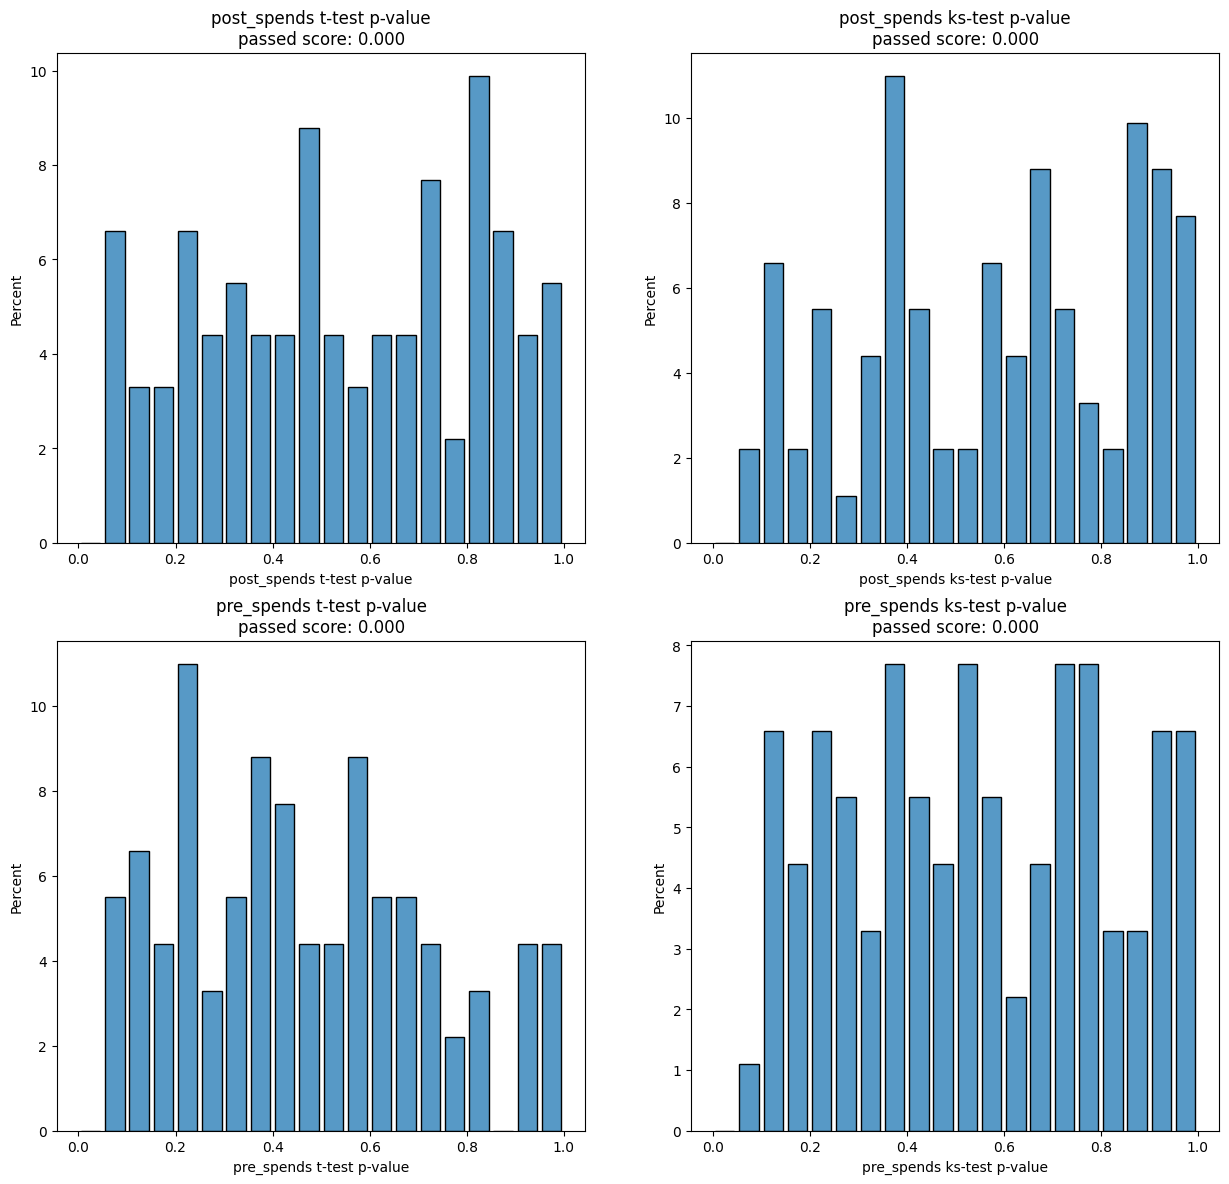

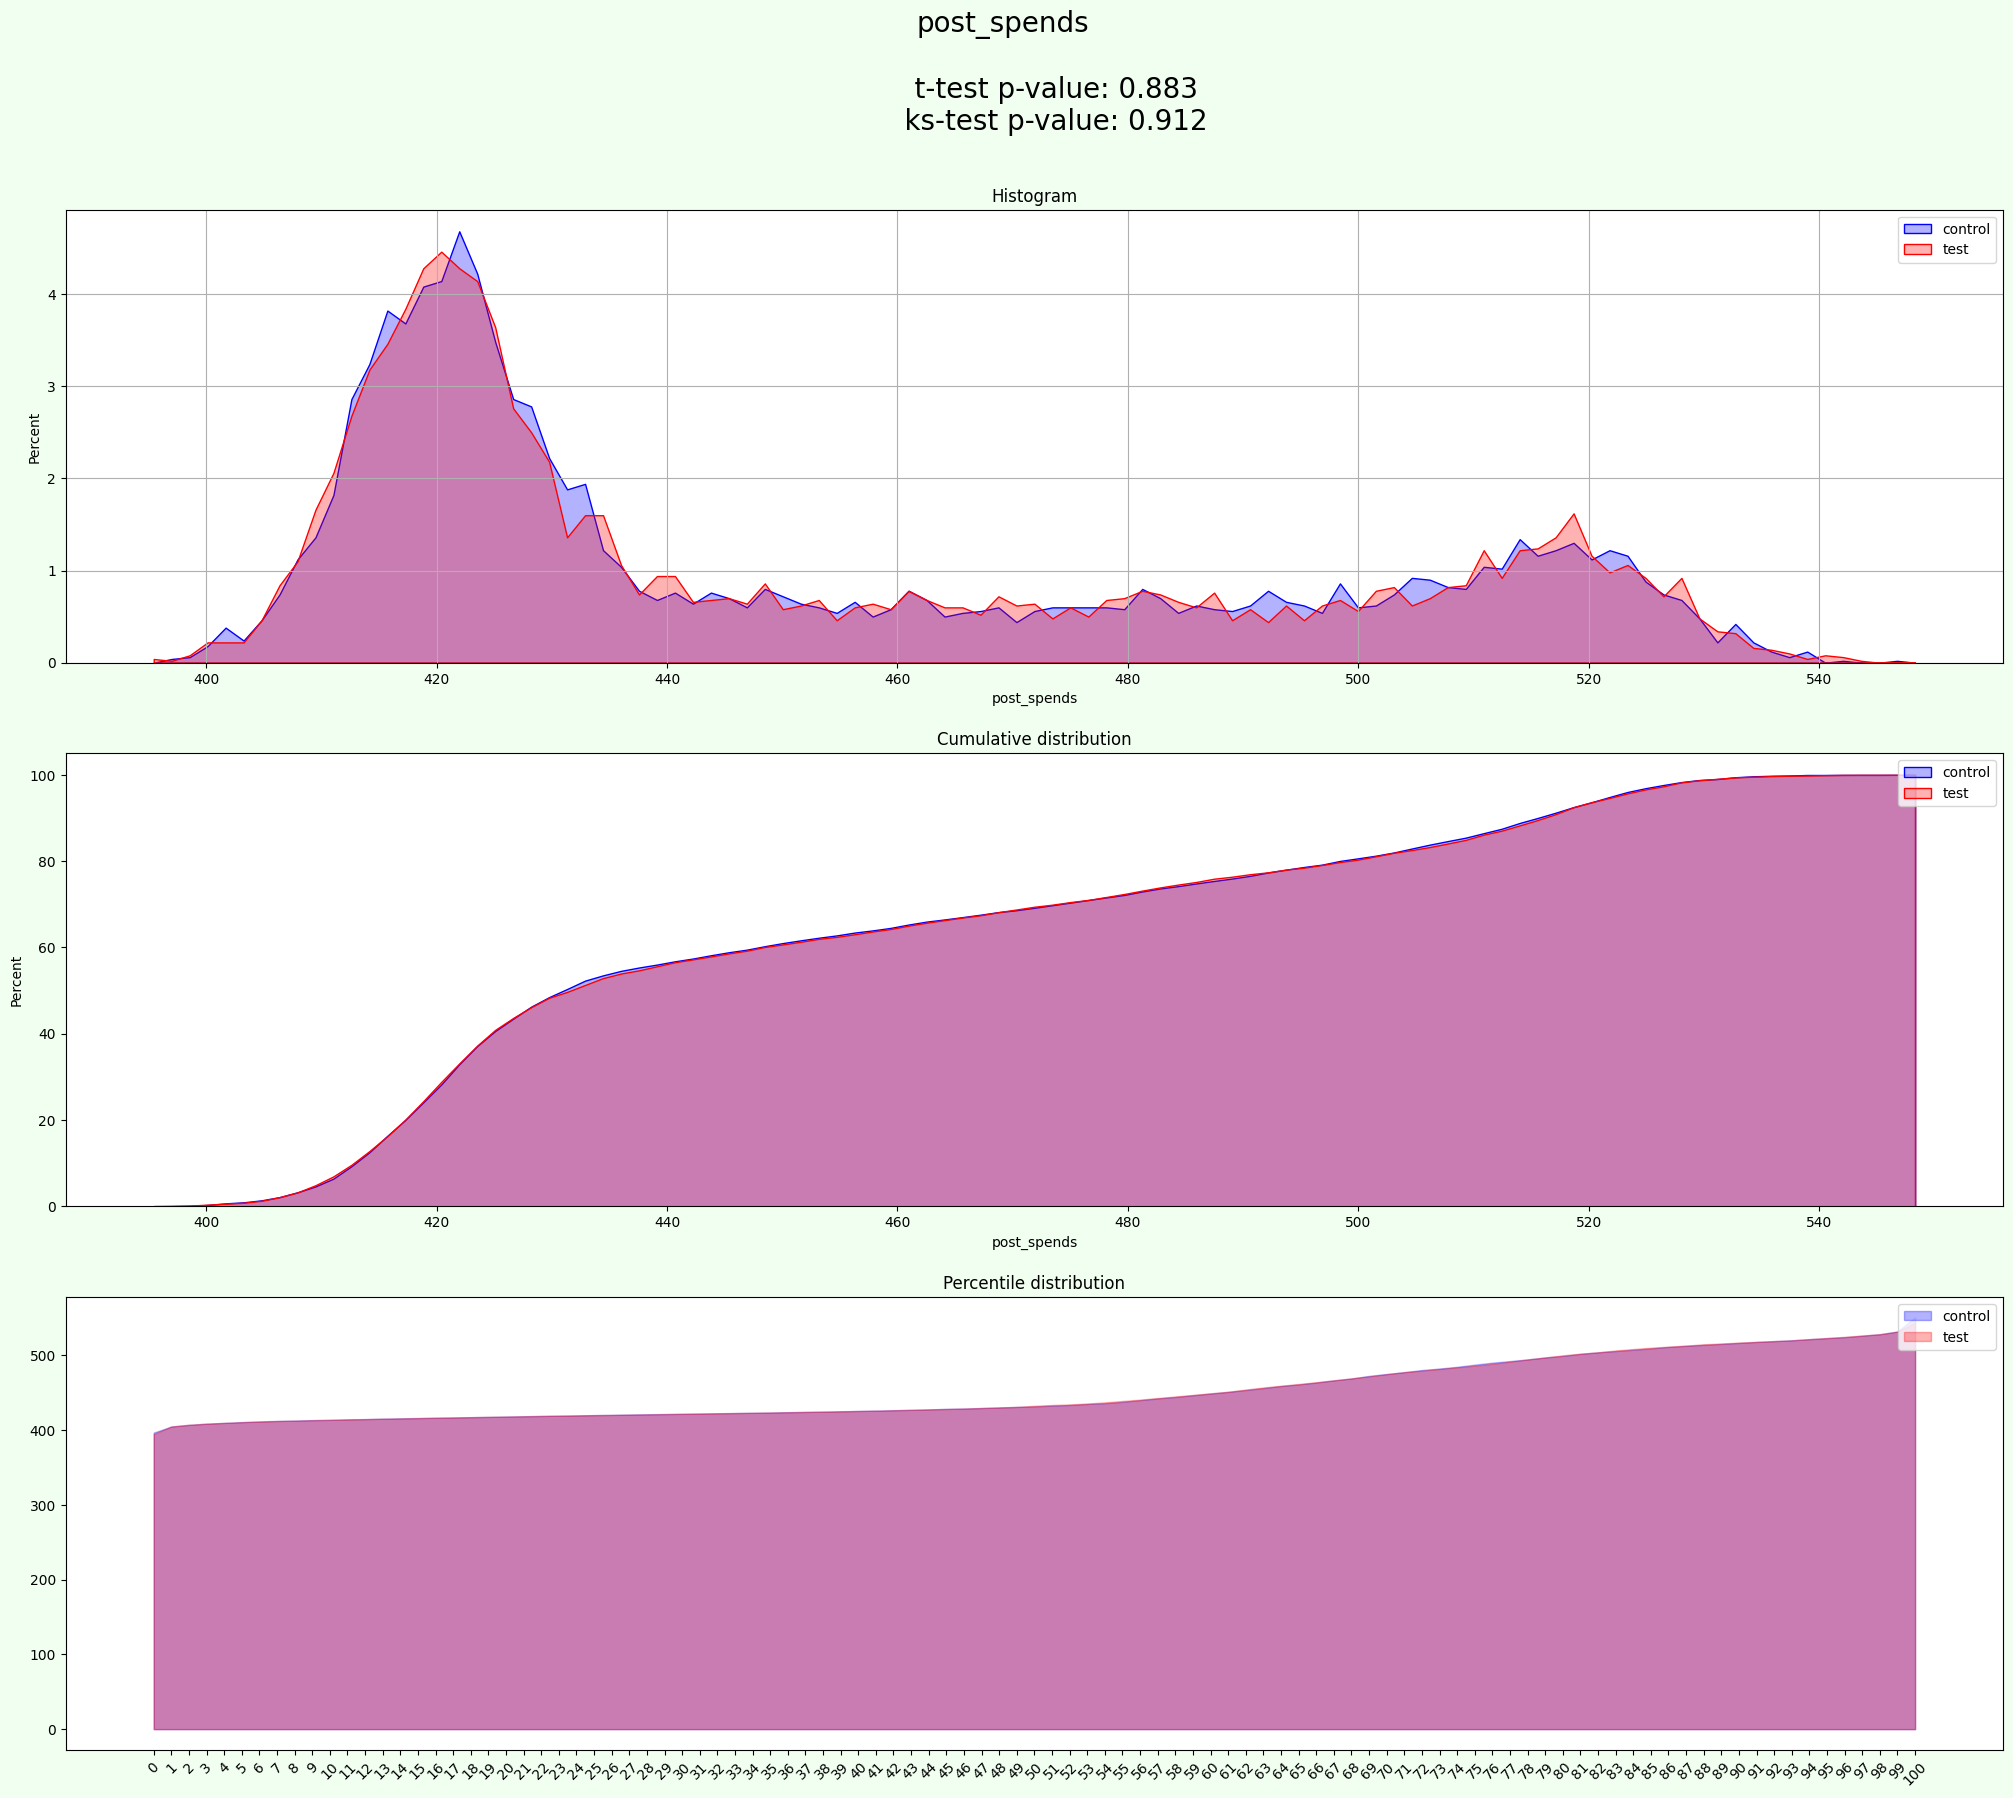

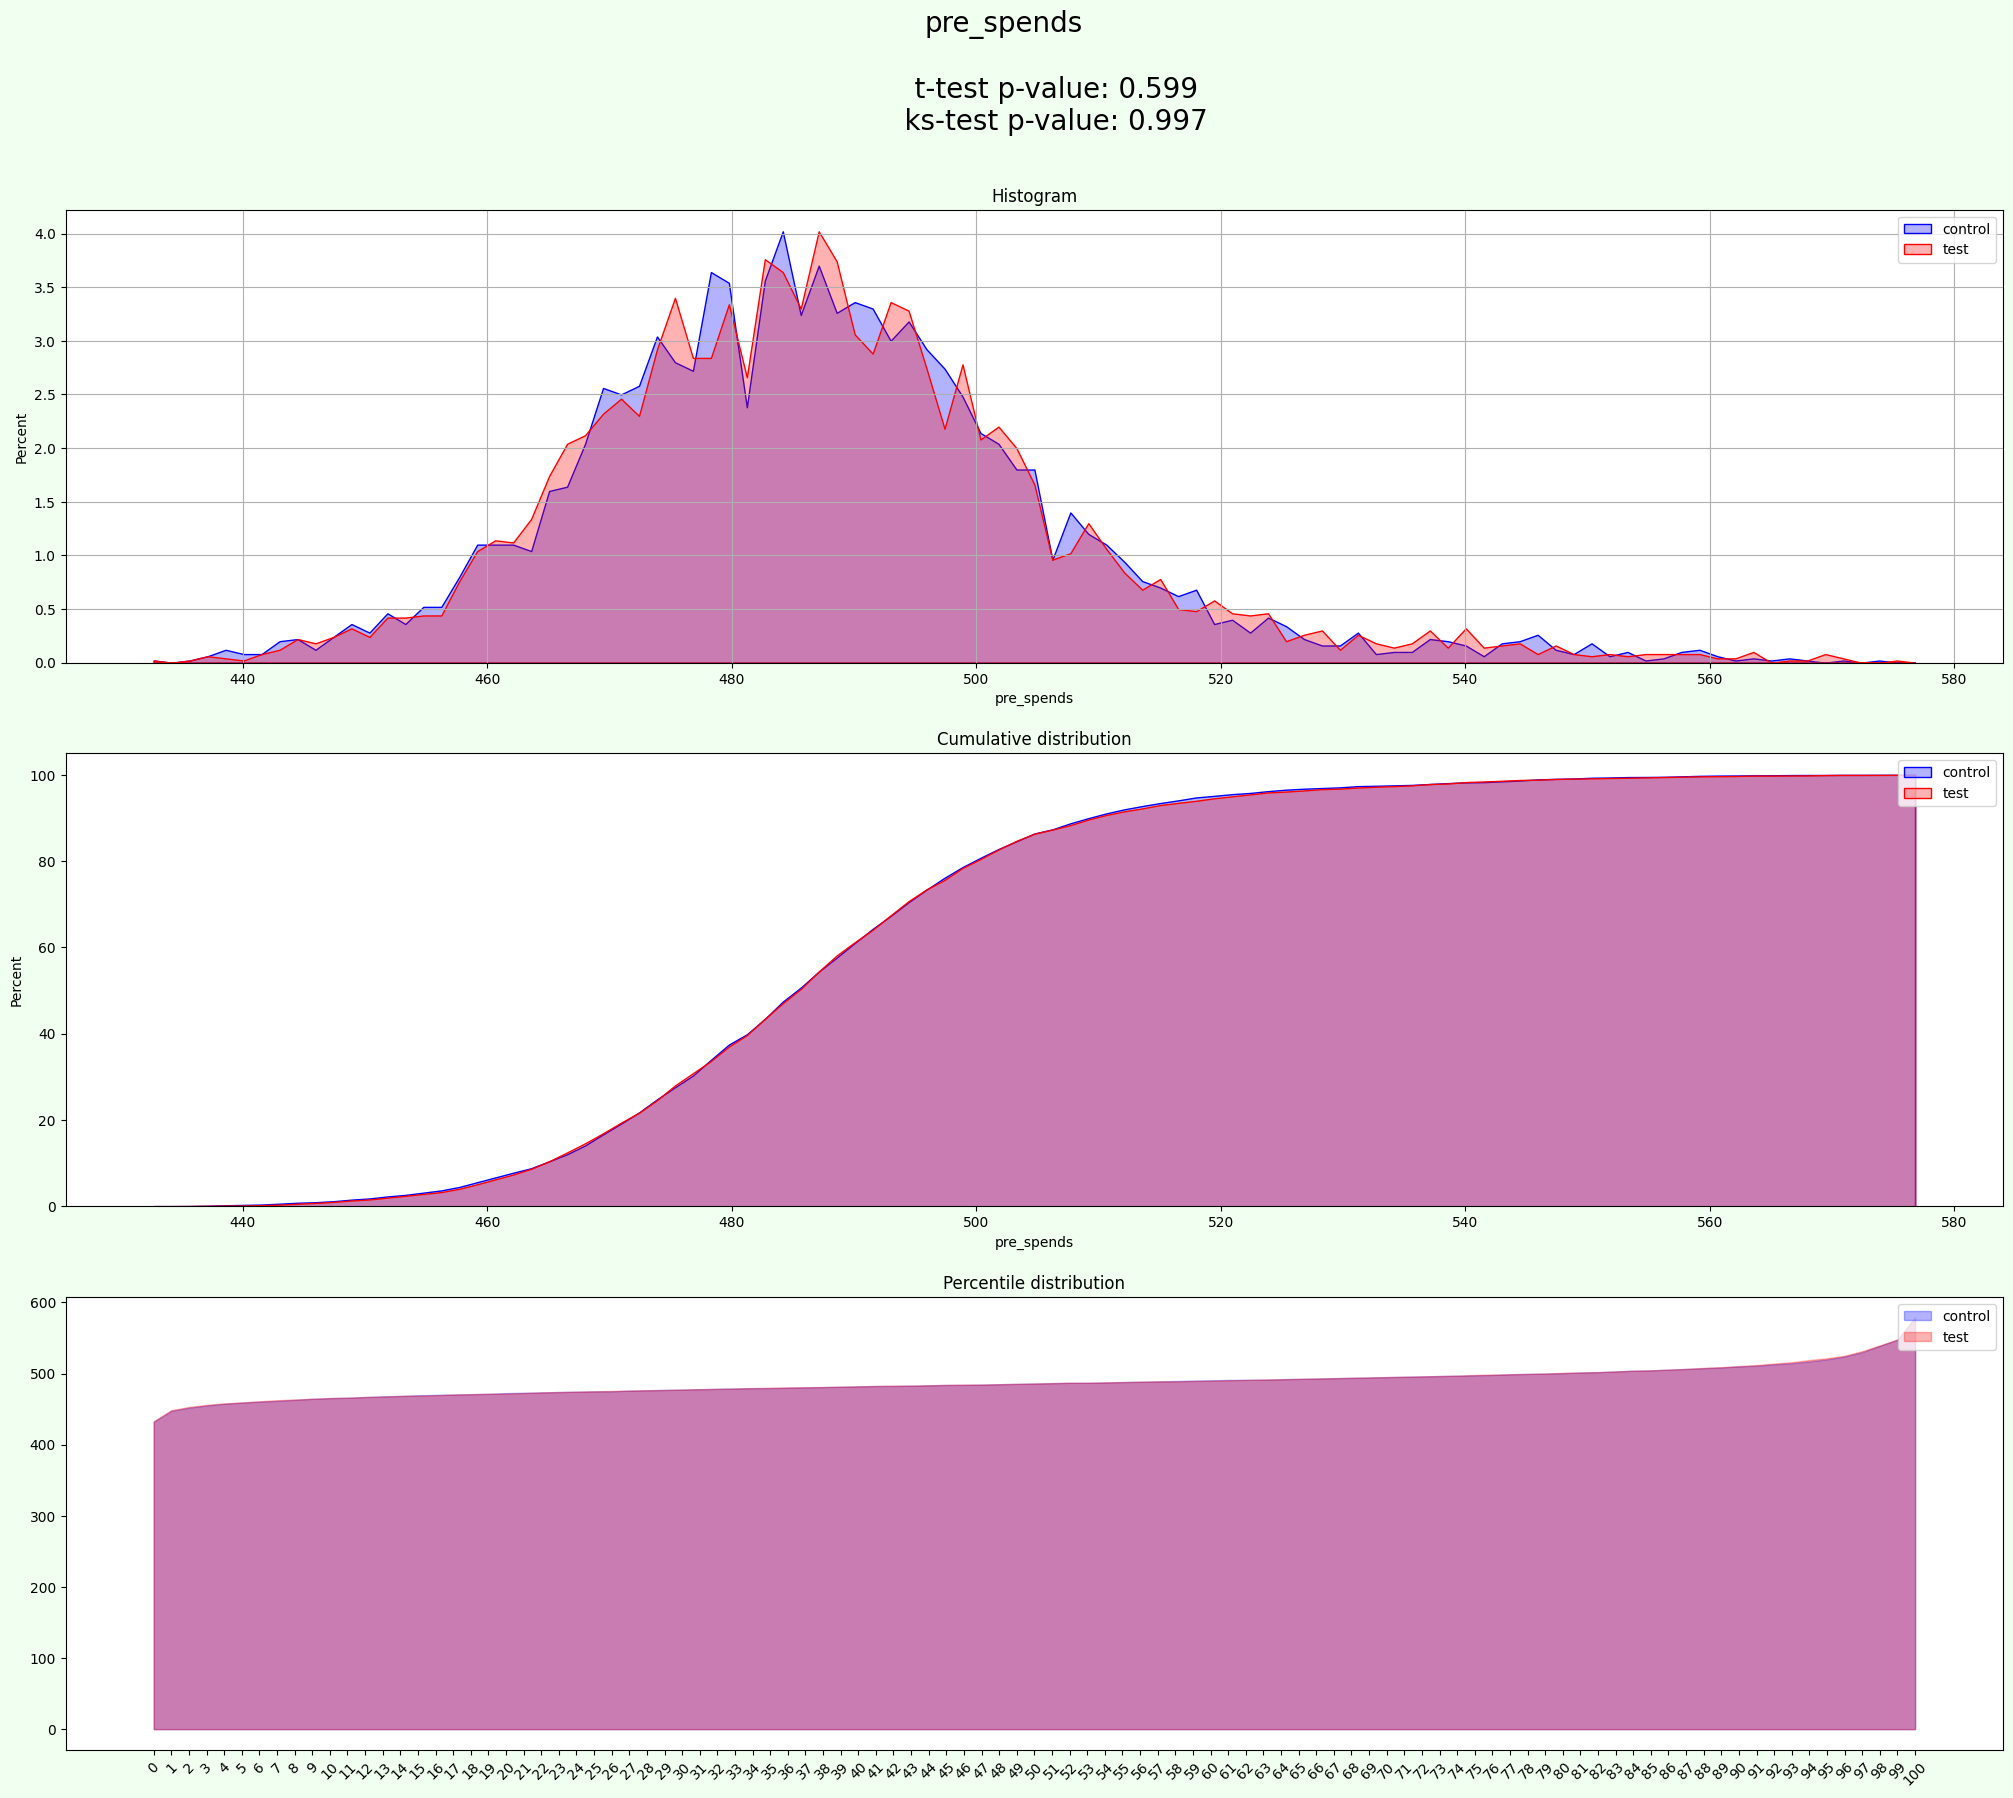

In [ ]:
from hypex import AATest

info_cols = ['user_id', 'signup_month']
target_fields = ['post_spends', 'pre_spends']

experiment = AATest(info_cols=info_cols, target_fields=target_fields)

results = experiment.process(data, iterations=100) # TODO увеличить кол-во итераций

- `aa-score` = Estimates mean passed score for t-test and ks-test in AA-test.

- `passed` = p_value < alpha

- `passed score`: 0.8⋅𝛼 ≤ 𝑥 ≤ 1.2⋅𝛼

  Проверяется, попадает ли результат теста 𝑥 в окрестность α с допуском 20% в обе стороны.
Это можно интерпретировать как "допустимое отклонение" от ожидаемого значения для уровня значимости.

In [ ]:
show_result(results)

experiments


,random_state,post_spends a mean,post_spends b mean,post_spends ab delta,post_spends ab delta %,post_spends t-test p-value,post_spends ks-test p-value,post_spends t-test passed,post_spends ks-test passed,pre_spends a mean,...,pre_spends ks-test passed,control %,test %,control size,test size,t-test mean p-value,ks-test mean p-value,t-test passed %,ks-test passed %,mean_tests_score
0,0,451.571422,451.399222,-0.172200,-0.038148,0.826345,0.193881,False,False,487.2736,...,False,50.0,50.0,5000,5000,0.480940,0.266913,0.0,0.0,0.338255
1,1,451.315000,451.655644,0.340644,0.075421,0.664288,0.379103,False,False,487.3294,...,False,50.0,50.0,5000,5000,0.447575,0.577760,0.0,0.0,0.534365
2,4,451.555622,451.415022,-0.140600,-0.031147,0.857834,0.822301,False,False,487.4572,...,False,50.0,50.0,5000,5000,0.729151,0.675153,0.0,0.0,0.693153
3,7,452.156422,450.814222,-1.342200,-0.297728,0.087237,0.068089,False,False,487.6501,...,False,50.0,50.0,5000,5000,0.354209,0.251790,0.0,0.0,0.285930
4,8,451.529667,451.440978,-0.088689,-0.019646,0.910035,0.864333,False,False,487.4846,...,False,50.0,50.0,5000,5000,0.807309,0.930184,0.0,0.0,0.889226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,95,451.597867,451.372778,-0.225089,-0.049868,0.774284,0.577046,False,False,487.6325,...,False,50.0,50.0,5000,5000,0.731241,0.652456,0.0,0.0,0.678717
80,96,451.108422,451.862222,0.753800,0.166821,0.336853,0.379103,False,False,487.6710,...,False,50.0,50.0,5000,5000,0.441194,0.593239,0.0,0.0,0.542558
81,97,451.698489,451.272156,-0.426333,-0.094474,0.587010,0.836797,False,False,487.3973,...,False,50.0,50.0,5000,5000,0.494010,0.621758,0.0,0.0,0.579175
82,98,451.437222,451.533422,0.096200,0.021305,0.902453,0.949728,False,False,487.6897,...,False,50.0,50.0,5000,5000,0.692209,0.671245,0.0,0.0,0.678233



aa_score


,t-test passed score,ks-test passed score,t-test aa passed,ks-test aa passed
post_spends,0.0,0.0,0.0,0.0
pre_spends,0.0,0.0,0.0,0.0
mean,0.0,0.0,0.0,0.0



split


,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry,group
0,0,0,0,490.0,416.111111,30,M,E-commerce,test
1,1,0,0,519.5,426.000000,31,M,Logistics,test
2,6,1,1,542.5,523.333333,57,F,E-commerce,test
3,7,4,1,458.0,494.555556,50,M,Logistics,test
4,9,0,0,502.0,426.888889,57,M,E-commerce,test
...,...,...,...,...,...,...,...,...,...
9995,9993,0,0,497.5,418.777778,49,M,Logistics,control
9996,9994,7,1,481.5,470.222222,32,F,E-commerce,control
9997,9996,6,1,496.0,494.111111,31,F,Logistics,control
9998,9998,4,1,483.0,513.444444,52,F,E-commerce,control



best_experiment_stat


,a mean,b mean,ab delta,ab delta %,t-test p-value,ks-test p-value,t-test passed,ks-test passed
post_spends,451.452711,451.517933,0.065222,0.014445,0.933775,0.922858,False,False
pre_spends,487.5932,487.5197,-0.0735,-0.015076,0.846236,0.922858,False,False



split_stat


,78
control %,50.0
test %,50.0
control size,5000
test size,5000
t-test mean p-value,0.890006
ks-test mean p-value,0.922858
t-test passed %,0.0
ks-test passed %,0.0
mean_tests_score,0.911907



resume


,aa test passed,split is uniform
post_spends,not OK,OK
pre_spends,not OK,OK


## Дополнительные 10 баллов в ДЗ за

[pull request в Hypex](https://github.com/sb-ai-lab/Hypex/blob/master/.github/CONTRIBUTING.md) для исправления `IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed` при передаче только одного вида таргета (0% осуждения, 100% понимания)

Как воспроизвести:

```
from hypex.utils.tutorial_data_creation import create_test_data

data = create_test_data(rs=52, na_step=10, nan_cols=['age', 'gender'])

info_cols = ['user_id', 'signup_month']
target_fields = ['post_spends']

experiment = AATest(info_cols=info_cols, target_fields=target_fields)
results = experiment.process(data, iterations=10)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

```

  0%|          | 0/10 [00:00<?, ?it/s]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

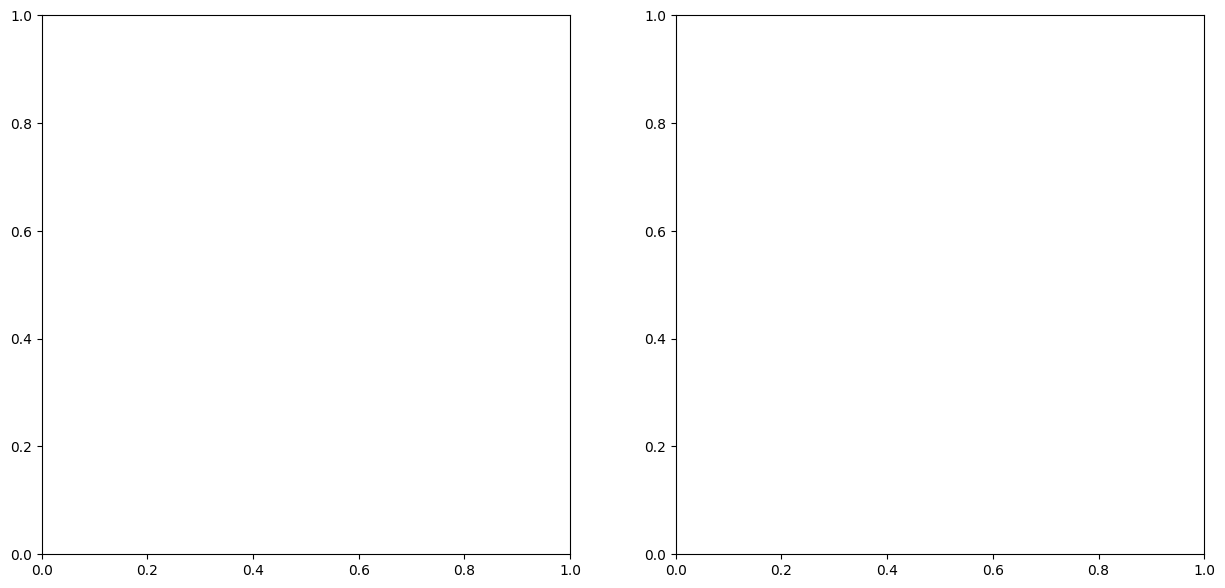

In [ ]:
experiment = AATest(info_cols=info_cols, target_fields=['post_spends'])
results = experiment.process(data, iterations=10)

# Функционал А/В теста Hypex

## метрики
- $ATE$ = разница средних `diff in means`
- разница разниц `diff in diff` (когда из средних вычитаем среднее периода ДО теста) $DiD = (\bar{Y}_{A{\text{после}}} - \bar{Y}_{A{\text{до}}}) - (\bar{Y}_{B{\text{после}}} - \bar{Y}_{B{\text{до}}})$
- CUPED = $\hat{\tau}_{\text{CUPED}} = (\bar{Y}_A - \beta \bar{X}_A) - (\bar{Y}_B - \beta \bar{X}_B)$ и $\beta = \frac{\text{Cov}(Y, X)}{\text{Var}(X)}$

## Критерии

- t-test
- mann-whitney

In [ ]:
data_ab = data.copy()

half_data = int(data.shape[0] / 2)
data_ab['group'] = ['test'] * half_data + ['control'] * half_data
data_ab.head(3)

,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry,group
0,0,0,0,473.5,404.444444,60,F,Logistics,test
1,1,0,0,486.5,414.000000,53,F,Logistics,test
2,2,1,1,560.0,510.222222,40,M,Logistics,test


In [ ]:
from hypex import ABTest

model = ABTest()

results = model.execute(
    data=data_ab,
    target_field='post_spends',
    target_field_before='pre_spends',
    group_field='group'
)

In [ ]:
results.keys()

dict_keys(['size', 'difference', 'p-value'])

In [ ]:
results['p-value']

{'t-test': 0.1480708978492508, 'mann_whitney': 0.06908462591016286}

In [ ]:
results

{'size': {'test': 5000, 'control': 5000},
 'difference': {'ate': -0.06702222222230603,
  'medain_diff': 0.2222222222221717,
  'cuped': -0.06732619022764652,
  'diff_in_diff': -0.06772222222230084},
 'p-value': {'t-test': 0.9324659245512648, 'mann_whitney': 0.7492663761137475}}

In [ ]:
model = ABTest(calc_difference_method='ate')
model.execute(data=data_ab, target_field='post_spends',
              group_field='group')

{'size': {'test': 5000, 'control': 5000},
 'difference': {'ate': -0.06702222222230603},
 'p-value': {'t-test': 0.9324659245512648, 'mann_whitney': 0.7492663761137475}}

In [ ]:
model = ABTest(calc_difference_method='diff_in_diff')
model.execute(data=data_ab, target_field='post_spends',
              target_field_before='pre_spends',
              group_field='group')

{'size': {'test': 5000, 'control': 5000},
 'difference': {'diff_in_diff': -0.06772222222230084},
 'p-value': {'t-test': 0.9324659245512648, 'mann_whitney': 0.7492663761137475}}

# Мэтчинг

Сценарий:
Вы хотите понять, приводит ли «самостоятельное открытие» пользователем определённой функциональности сервиса (например, использование функции «Пропустить заставку») к изменению его дальнейшего паттерна потребления, например, spend (времени в приложении).

**Почему нельзя провести классический A/B-тест:**

Данный функционал уже доступен всем пользователям. Некоторые из них сами «наткнулись» на эту функцию и стали активно ею пользоваться, а другие — нет.
Невозможно рандомизировать и заставить одну группу пользователей «случайным образом» начать пользоваться функцией, а другую — нет. То есть вы не можете назначить условие эксперимента так, как это делается с новыми фичами, которые показываются одной группе и не показываются другой.
Пользователи сами принимают решение осваивать или не осваивать определённый функционал, и вы не можете искусственно контролировать это решение.

Итог:

вы не можете присвоить «treatment» (использование функции) и «control» (неиспользование) путём случайного распределения. Поведение пользователей — их собственный выбор. Это затрудняет применение классического A/B-теста и вынуждает обращаться к наблюдательным данным, методам causal анализа или к построению соответствия между пользователями, добровольно использующими функционал, и похожими на них пользователями, которые его не используют.

## Почему такое (отсутствие А/B теста) могло произойти:

- аналитиков забыли спросить (а менеджер хочет премию перед нг и скорее выкатил фичу на всех)
- вы решили измерить эффект того, что работало ДО вас
- А/B тест невозможно провести по логической причине (не можем кому-то дать кредит, а кому-то - не дать без причины, или это медицинское исследование с серьезными последствиями для здоровья)


# Causal Inference основы

Когда ищем
- связь X -> Y (Х влияет на Y)
- величину влияния

Не корреляция, а именно влияние (causation [козЭйшн](https://youglish.com/pronounce/causation/english) ):


```Correlation does not imply causation.```

## Основные термины

- существуют юниты $i=1..N$ — клиенты, пациенты и тд;
- они находятся под определенным treatment’ом $t=[0,1]$ — переменная, имеющая 2 разных варианта;
- потенциальные исходы $Y(i)$ (potential outcomes) — результат или итог, верный под определенным условием (treatment’ом). Как правило, это наша целевая метрика, которую мы анализируем в А/В.
-  covariates $z_i$ — другие переменные (массив переменных), относящиеся к юниту i и влияющие на потенциальные исходы этого юнита. Например, в случае пользователя сайта, это может быть его возраст, дата регистрации или первой покупки.

## Хотим посчитать
$$Y(i|t=1) — Y(i|t=0)$$

 но это невозможно (для одного и того же юнита, только если в параллельных вселенных, так как не можем одновременно применить и не применить treatment) = фундаментальная проблема causal парадигмы

Поэтому мы **разделяем пользователей на 2 группы**, основываясь на предположении, что пользователиэтих групп похожи, treatment распределен независимо и тогда  вместо $Y(i|t=1) — Y(i|t=0)$ оцениваем метрики:

- **Average treatment effect**
$$ATE = E[Y(i|t=1) — Y(i|t=0)]$$

# Реализация мэтчинга в Hypex

Механизм matching-метода:
- каждому юниту из тритмента подбирается идентичный из контрола и наоборот

Точного совпадения может не быть, но выбирается метрика “близости” (например расстояние [Махаланобиса](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9C%D0%B0%D1%85%D0%B0%D0%BB%D0%B0%D0%BD%D0%BE%D0%B1%D0%B8%D1%81%D0%B0#:~:text=%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5%20%D0%9C%D0%B0%D1%85%D0%B0%D0%BB%D0%B0%D0%BD%D0%BE%CC%81%D0%B1%D0%B8%D1%81%D0%B0%20%E2%80%94%20%D0%BC%D0%B5%D1%80%D0%B0%20%D1%80%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D1%8F%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83,%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%BE%D0%BC%20%D0%9C%D0%B0%D1%85%D0%B0%D0%BB%D0%B0%D0%BD%D0%BE%D0%B1%D0%B8%D1%81%D0%BE%D0%BC%20%D0%B2%201936%20%D0%B3%D0%BE%D0%B4%D1%83)) и некий порог для нее. Юниты, расстояние между которыми меньше порога, считаются сматченными.

Поиск ближайших соседей реализован через библиотеку Faiss


- далее внутри **каждой** пары считается эффект (то есть разница в таргете)

- который затем усредняется для получения ATE, ATT и ATC.

Здесь ATT и ATC - вспомогательные метрики, на основе которых затем считается ATE как их взвешенная сумма.

**ATT = Average treatment effect on the treated**
= разница в таргетной группе между тем, какой потенциальный исход мы имеем (после применения маркетинговой акции или запуска новой фичи), и тем, каким он был бы в случае отсутствия treatment’а.

$$ATT = E[Y(i=1|t=1) — Y(i=0|t=1)] $$

```y_treated - y_match_treated```

**ATC Average Treatment Effect for the control group (ATC)**

$$ATC = E[Y(i=1|t=0) — Y(i=0|t=0)]$$

```y_match_untreated - y_untreated```

И тогда $$ATE = \frac{N_{treat}}{N} ATT + \frac{N_{control}}{N} ATC$$

https://hypex.readthedocs.io/en/latest/pages/modules/generated/hypex.matcher.Matcher.html

## Гипотезы для проверки над данными

В ходе расчетов будем проверять гипотезу о том, что (например, для ATE)

$H_0: АTE=0$

Интерпретация: под нулевой гипотезой мы предполагаем, что наличие treatment не меняет среднюю целевую метрику по сравнению с ситуацией без treatment.

$H_1: ATE != 0$

Альтернативная гипотеза, что эффект от вмешательства treatment есть

- p_value считается с помощью одновыброчного [z-test](https://en.wikipedia.org/wiki/Z-test). Он применяется для проверки гипотезы о среднем значении генеральной совокупности - так как по ЦПТ предполагаем, что ATE и прочие метрики распределены нормально (это же матожидания)

In [ ]:
from hypex import Matcher

model = Matcher(input_data=data, outcome=['post_spends'],
                treatment='treat', info_col=['user_id'])

In [ ]:
results, quality_results, df_matched = model.estimate()

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
results

,effect_size,std_err,p-val,ci_lower,ci_upper,outcome
ATE,83.717322,1.471949,0.0,80.832302,86.602343,post_spends
ATC,104.028064,2.798859,0.0,98.542300,109.513829,post_spends
ATT,63.528080,0.621631,0.0,62.309683,64.746477,post_spends


## Variable quality_results contains:

### PSI (Population Stability Index)
shows the difference between treated and untreated populations

Rules:

- PSI < 0.1 - No change. You can continue using existing model.
- PSI >=0.1 but less than 0.2 - Slight change is required.
- PSI >=0.2 - Significant change is required. Ideally, you should not use this model any more.

### SMD (Standardized Mean Differences)

The standard mean deviation between initial and matched dataframes

helps to check if the balance of the groups has been reached

Rules:

- Smaller than 0.1. For a randomized trial, the smd between all the covariates should typically fall into this bucket.
- 0.1 - 0.2. Not necessarily balanced, but small enough that people are usually not too worried about them.
- 0.2. Values that are greater than this threshold are considered seriously imbalanced.

### Repeats
shows the fraction of duplicated indexes

https://github.com/sb-ai-lab/HypEx/blob/master/examples/tutorials/Matching.ipynb

In [ ]:
show_result(quality_results)

psi


,column_treated,anomaly_score_treated,check_result_treated,column_untreated,anomaly_score_untreated,check_result_untreated
0,age_treated,0.00,OK,age_untreated,0.05,OK
1,gender_M_treated,0.00,OK,gender_M_untreated,0.00,OK
2,industry_Logistics_treated,0.00,OK,industry_Logistics_untreated,0.00,OK
3,pre_spends_treated,0.54,NOK,pre_spends_untreated,0.19,OK
4,signup_month_treated,16.15,NOK,signup_month_untreated,0.00,OK



ks_test


,match_control_to_treat,match_treat_to_control
age,4.228608e-01,4.356483e-04
pre_spends,1.850193e-212,4.330001e-29
signup_month,0.000000e+00,0.000000e+00



smd


,match_control_to_treat,match_treat_to_control
age,0.017855,0.010480
pre_spends,0.564427,0.110849
signup_month,1.879261,inf



repeats


{'match_control_to_treat': 0.44, 'match_treat_to_control': 0.08}

In [ ]:
# визуально сравнить сопоставленные пары
df_matched.head(100)

,index,signup_month,pre_spends,age,gender_M,industry_Logistics,signup_month_matched,pre_spends_matched,age_matched,gender_M_matched,industry_Logistics_matched,index_matched,post_spends,post_spends_matched,post_spends_matched_bias,treat,treat_matched
0,7981,10,474.5,28,1,0,0.0,497.0,28.0,1.0,0.0,[2701],436.222222,433.000000,2.811041,1,0
1,1007,11,478.5,50,1,0,0.0,503.5,50.0,1.0,0.0,[3825],434.222222,414.777778,18.987577,1,0
2,7264,5,472.5,28,1,1,0.0,483.0,28.0,1.0,1.0,[1328],498.444444,412.111111,86.141449,1,0
3,7283,7,488.5,34,0,1,0.0,503.5,34.0,0.0,1.0,[3820],483.555556,401.777778,81.503657,1,0
4,7247,5,476.5,45,1,1,0.0,488.0,45.0,1.0,1.0,[8089],495.666667,416.444444,79.012063,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8143,10,483.5,30,0,0,0.0,505.0,29.0,0.0,0.0,[6098],419.444444,419.000000,0.042955,1,0
96,7184,1,534.5,22,0,1,0.0,537.5,22.0,0.0,1.0,[1689],521.444444,419.888889,101.500731,1,0
97,928,9,494.0,32,0,1,0.0,514.0,31.0,0.0,1.0,[6587],452.555556,409.777778,42.403701,1,0
98,8114,9,495.0,59,0,0,0.0,514.0,59.0,0.0,0.0,[6750],450.333333,422.333333,27.652780,1,0


## Другие библиотеки по causal inference

- CausalML
- EconML
- DoWhy

# `Growthbook` - open source платформа для выкатки A/B-тестов

https://github.com/growthbook

## Техническая реализация

- `Feature Flag` — это кусок кода, позволяющий управлять включением или отключением определённых функций или возможностей в приложении без необходимости изменения или развертывания нового кода. По сути, это условные переключатели, которые контролируют доступность тех или иных частей функционала для пользователей.

Их выносят в админку, чтобы можно было собрать конфигурацию А/Б теста

- Разворачивается UI http://localhost:3000/experiments

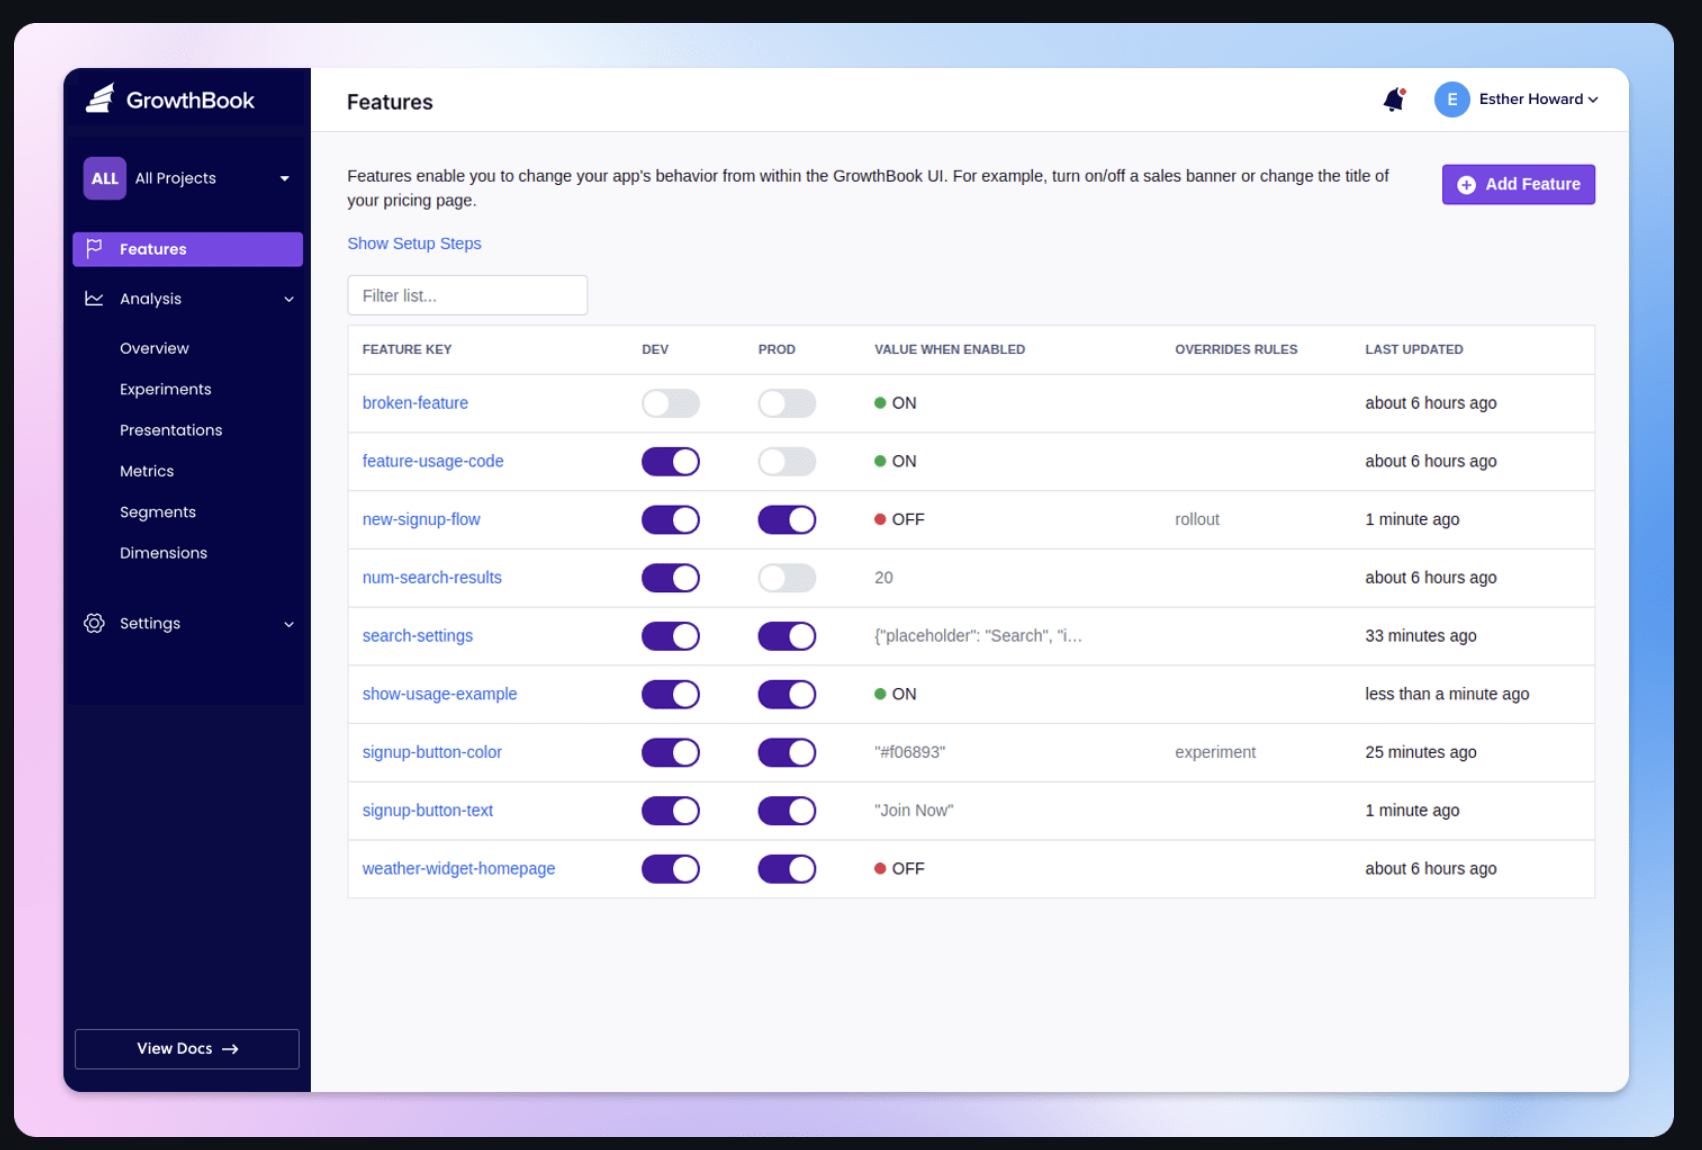

```
# пример feature flag

from feature_flags import FEATURE_FLAGS

def old_greeting():
    return "Добро пожаловать в наше приложение!"

def new_greeting():
    return "Здравствуйте! Мы рады видеть вас в нашем обновленном приложении."

def get_greeting():
    if FEATURE_FLAGS.get("new_greeting"):
        return new_greeting()
    else:
        return old_greeting()

if __name__ == "__main__":
    print(get_greeting())
```


## Математика  https://docs.growthbook.io/statistics/overview

- Bayesian Statistics

Instead of p-values and confidence intervals, you get probabilities and distributions of likely outcomes. These values allow you to make statements like "there’s a 95% chance this new button is better and a 5% chance it’s worse"

- Frequentist (классические А/B-тесты)
  - The current frequentist engine computes **two-sample t-tests** for relative percent change;
  - you can reduce variance (via **CUPED**)
  -  you can enable **sequential testing** to mitigate concerns with peeking.

# Важные поинты работы с open source

1. Следите за динамикой развития open source библиотеки
2. Если она становится критически важной зависимостью в вашем проекте, не спешите обновлять ее (может не работать обратная совместимость / переименование / полное удаление методов)
3. Помните, что вы сами всегда можете контрибьютить


# Полезные ссылки

1. Про Сберовский HypEx (Блок с А/B тестами появился в 2023)

 https://noml.notion.site/HypEx-A-B-Python-df71c50ef160426793bd4b4758493ff8

2. Семинар про Abrosia от МТС, курс мат.стат. ИТМО 2024

  https://colab.research.google.com/drive/1VgoDqaXp-VtukwWcY30XroPhcHcjTA7K?usp=sharing

3. Статья про causal inference https://koch-kir.medium.com/causal-inference-from-observational-data-%D0%B8%D0%BB%D0%B8-%D0%BA%D0%B0%D0%BA-%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%81%D1%82%D0%B8-%D0%B0-%D0%B2-%D1%82%D0%B5%D1%81%D1%82-%D0%B1%D0%B5%D0%B7-%D0%B0-%D0%B2-%D1%82%D0%B5%D1%81%D1%82%D0%B0-afb84f2579f2